In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
crime_df = pd.read_csv("hatecrime.csv")

C:\Users\91700\AppData\Local\Temp\ipykernel_33612\452978623.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_df = pd.read_csv("hatecrime.csv")


In [3]:
crime_df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,Bais_Description,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Race/Ethnicity/Ancestry,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Race/Ethnicity/Ancestry,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Race/Ethnicity/Ancestry,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Race/Ethnicity/Ancestry,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Race/Ethnicity/Ancestry,Individual,S,S


In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [5]:
crime_df.shape

(209441, 29)

In [6]:
crime_df.columns

Index(['INCIDENT_ID', 'DATA_YEAR', 'ORI', 'PUB_AGENCY_NAME', 'PUB_AGENCY_UNIT',
       'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME', 'DIVISION_NAME',
       'REGION_NAME', 'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC',
       'INCIDENT_DATE', 'ADULT_VICTIM_COUNT', 'JUVENILE_VICTIM_COUNT',
       'TOTAL_OFFENDER_COUNT', 'ADULT_OFFENDER_COUNT',
       'JUVENILE_OFFENDER_COUNT', 'OFFENDER_RACE', 'OFFENDER_ETHNICITY',
       'VICTIM_COUNT', 'OFFENSE_NAME', 'TOTAL_INDIVIDUAL_VICTIMS',
       'LOCATION_NAME', 'BIAS_DESC', 'Bais_Description', 'VICTIM_TYPES',
       'MULTIPLE_OFFENSE', 'MULTIPLE_BIAS'],
      dtype='object')

In [7]:
((crime_df.isnull().sum())/crime_df.shape[0])*100

INCIDENT_ID                  0.000000
DATA_YEAR                    0.000000
ORI                          0.000000
PUB_AGENCY_NAME              0.000000
PUB_AGENCY_UNIT             97.156240
AGENCY_TYPE_NAME             0.000000
STATE_ABBR                   0.000000
STATE_NAME                   0.000000
DIVISION_NAME                0.000000
REGION_NAME                  0.000000
POPULATION_GROUP_CODE        0.000000
POPULATION_GROUP_DESC        0.000000
INCIDENT_DATE                0.000000
ADULT_VICTIM_COUNT          79.678286
JUVENILE_VICTIM_COUNT       80.123758
TOTAL_OFFENDER_COUNT         0.000000
ADULT_OFFENDER_COUNT        81.035232
JUVENILE_OFFENDER_COUNT     81.038574
OFFENDER_RACE                0.009549
OFFENDER_ETHNICITY          87.920226
VICTIM_COUNT                 0.000000
OFFENSE_NAME                 0.000000
TOTAL_INDIVIDUAL_VICTIMS     1.245697
LOCATION_NAME                0.000000
BIAS_DESC                    0.000000
Bais_Description             0.000000
VICTIM_TYPES

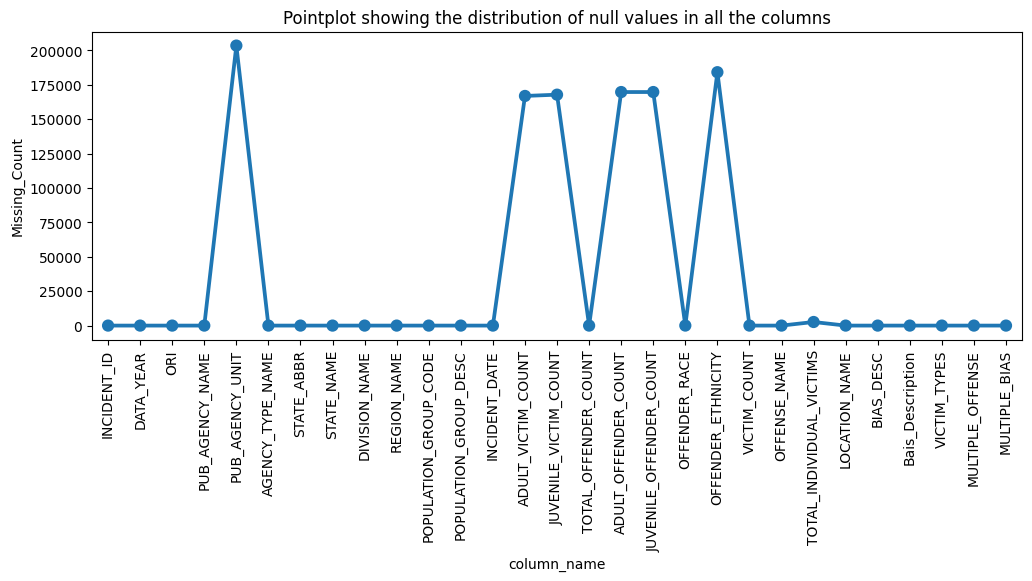

In [8]:
missing_data = crime_df.isnull().sum()
missing_data = missing_data.reset_index()
missing_data.columns= ['column_name','Missing_Count']
missing_data
fig,ax = plt.subplots(figsize = (12,4))
sns.pointplot(data = missing_data , x = 'column_name' , y = 'Missing_Count' , ax = ax)
plt.xticks(fontsize = 10 , rotation = 'vertical')
ax.set_title('Pointplot showing the distribution of null values in all the columns')
plt.show()

In [9]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209441 entries, 0 to 209440
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   INCIDENT_ID               209441 non-null  int64  
 1   DATA_YEAR                 209441 non-null  int64  
 2   ORI                       209441 non-null  object 
 3   PUB_AGENCY_NAME           209441 non-null  object 
 4   PUB_AGENCY_UNIT           5956 non-null    object 
 5   AGENCY_TYPE_NAME          209441 non-null  object 
 6   STATE_ABBR                209441 non-null  object 
 7   STATE_NAME                209441 non-null  object 
 8   DIVISION_NAME             209441 non-null  object 
 9   REGION_NAME               209441 non-null  object 
 10  POPULATION_GROUP_CODE     209441 non-null  object 
 11  POPULATION_GROUP_DESC     209441 non-null  object 
 12  INCIDENT_DATE             209441 non-null  object 
 13  ADULT_VICTIM_COUNT        42562 non-null   f

In [10]:
crime_df['INCIDENT_DATE'] = pd.to_datetime(crime_df['INCIDENT_DATE'])

In [11]:
crime_df.describe()

,INCIDENT_ID,DATA_YEAR,ADULT_VICTIM_COUNT,JUVENILE_VICTIM_COUNT,TOTAL_OFFENDER_COUNT,ADULT_OFFENDER_COUNT,JUVENILE_OFFENDER_COUNT,VICTIM_COUNT,TOTAL_INDIVIDUAL_VICTIMS
count,209441.000000,209441.000000,42562.000000,41629.000000,209441.000000,39720.000000,39713.000000,209441.000000,206832.000000
mean,137716.681443,2004.768608,0.578521,0.076149,0.964563,0.487815,0.096089,1.243243,0.977566
std,150967.265404,8.163864,0.974765,0.406261,1.371747,0.787790,0.480359,1.142102,1.101683
min,2.000000,1991.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,52362.000000,1998.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,104722.000000,2004.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,157082.000000,2012.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,727695.000000,2019.000000,80.000000,40.000000,99.000000,30.000000,20.000000,200.000000,147.000000


In [12]:
crime_df.duplicated().sum()

0

In [13]:
crime_df.nunique()

INCIDENT_ID                 209441
DATA_YEAR                       29
ORI                           9343
PUB_AGENCY_NAME               6362
PUB_AGENCY_UNIT                609
AGENCY_TYPE_NAME                 8
STATE_ABBR                      53
STATE_NAME                      53
DIVISION_NAME                   11
REGION_NAME                      6
POPULATION_GROUP_CODE           20
POPULATION_GROUP_DESC           20
INCIDENT_DATE                10592
ADULT_VICTIM_COUNT              22
JUVENILE_VICTIM_COUNT           13
TOTAL_OFFENDER_COUNT            32
ADULT_OFFENDER_COUNT            15
JUVENILE_OFFENDER_COUNT         16
OFFENDER_RACE                    7
OFFENDER_ETHNICITY               4
VICTIM_COUNT                    48
OFFENSE_NAME                   344
TOTAL_INDIVIDUAL_VICTIMS        43
LOCATION_NAME                  123
BIAS_DESC                      216
Bais_Description                 6
VICTIM_TYPES                    52
MULTIPLE_OFFENSE                 2
MULTIPLE_BIAS       

In [14]:
crime_df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,POPULATION_GROUP_CODE,POPULATION_GROUP_DESC,INCIDENT_DATE,ADULT_VICTIM_COUNT,JUVENILE_VICTIM_COUNT,TOTAL_OFFENDER_COUNT,ADULT_OFFENDER_COUNT,JUVENILE_OFFENDER_COUNT,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,Bais_Description,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,5,"Cities from 10,000 thru 24,999",1991-08-31,NaN,NaN,1,NaN,NaN,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Race/Ethnicity/Ancestry,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,6,"Cities from 2,500 thru 9,999",1991-09-19,NaN,NaN,1,NaN,NaN,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Race/Ethnicity/Ancestry,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,3,"Cities from 50,000 thru 99,999",1991-07-04,NaN,NaN,1,NaN,NaN,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Race/Ethnicity/Ancestry,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,3,"Cities from 50,000 thru 99,999",1991-12-24,NaN,NaN,1,NaN,NaN,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Race/Ethnicity/Ancestry,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,3,"Cities from 50,000 thru 99,999",1991-12-23,NaN,NaN,1,NaN,NaN,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Race/Ethnicity/Ancestry,Individual,S,S


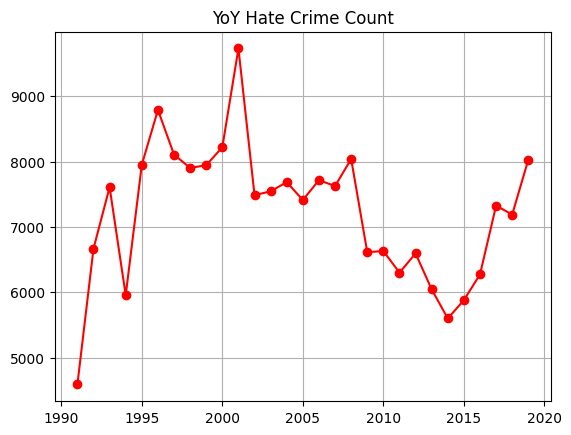

In [15]:
YoY_crime_count = crime_df.groupby('DATA_YEAR')['INCIDENT_ID'].count()
plt.plot(YoY_crime_count , color = 'r' , marker = 'o')
plt.title('YoY Hate Crime Count')
plt.grid(True)

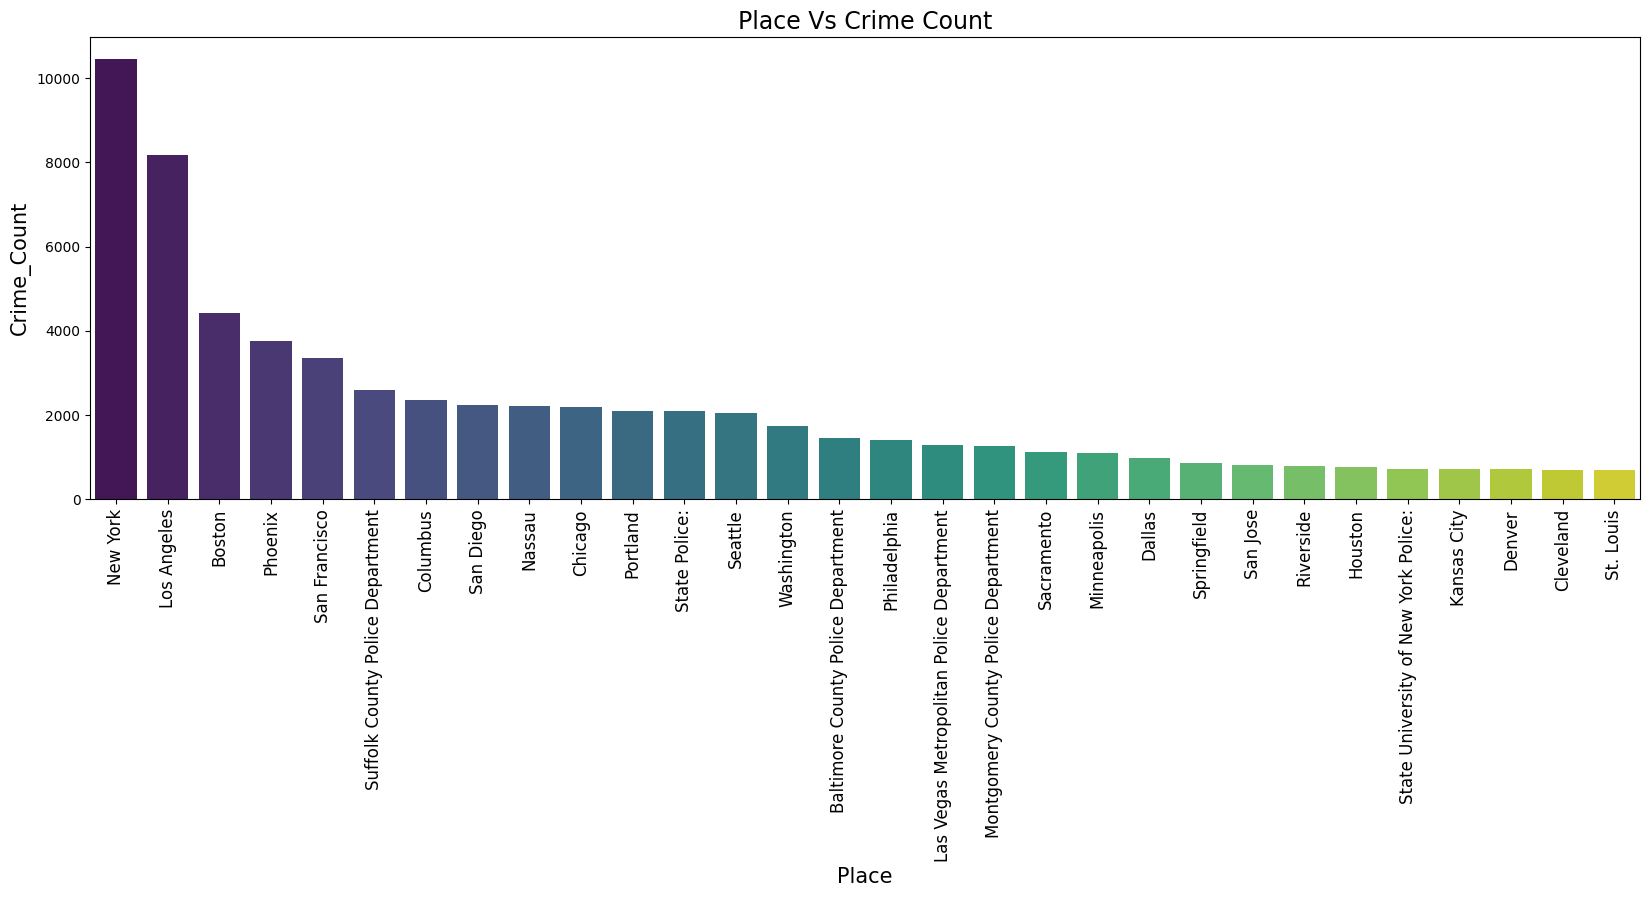

In [16]:
crime_cnt = crime_df['PUB_AGENCY_NAME'].value_counts().nlargest(30).reset_index()
crime_cnt.columns = ['Place','Crime_Count']
plt.figure(figsize = (20,6))
sns.barplot(data = crime_cnt , x = 'Place' , y = 'Crime_Count' , palette= 'viridis')
plt.xticks(rotation = 'vertical' , fontsize = 12)
plt.title('Place Vs Crime Count' , size = 17)
plt.xlabel('Place',size = 15)
plt.ylabel('Crime_Count',size = 15)
plt.show()

<Axes: ylabel='AGENCY_TYPE_NAME'>

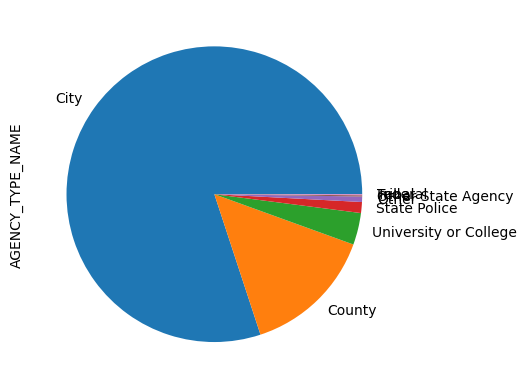

In [17]:
crime_df['AGENCY_TYPE_NAME'].value_counts().sort_values(ascending = False).plot(kind = 'pie')

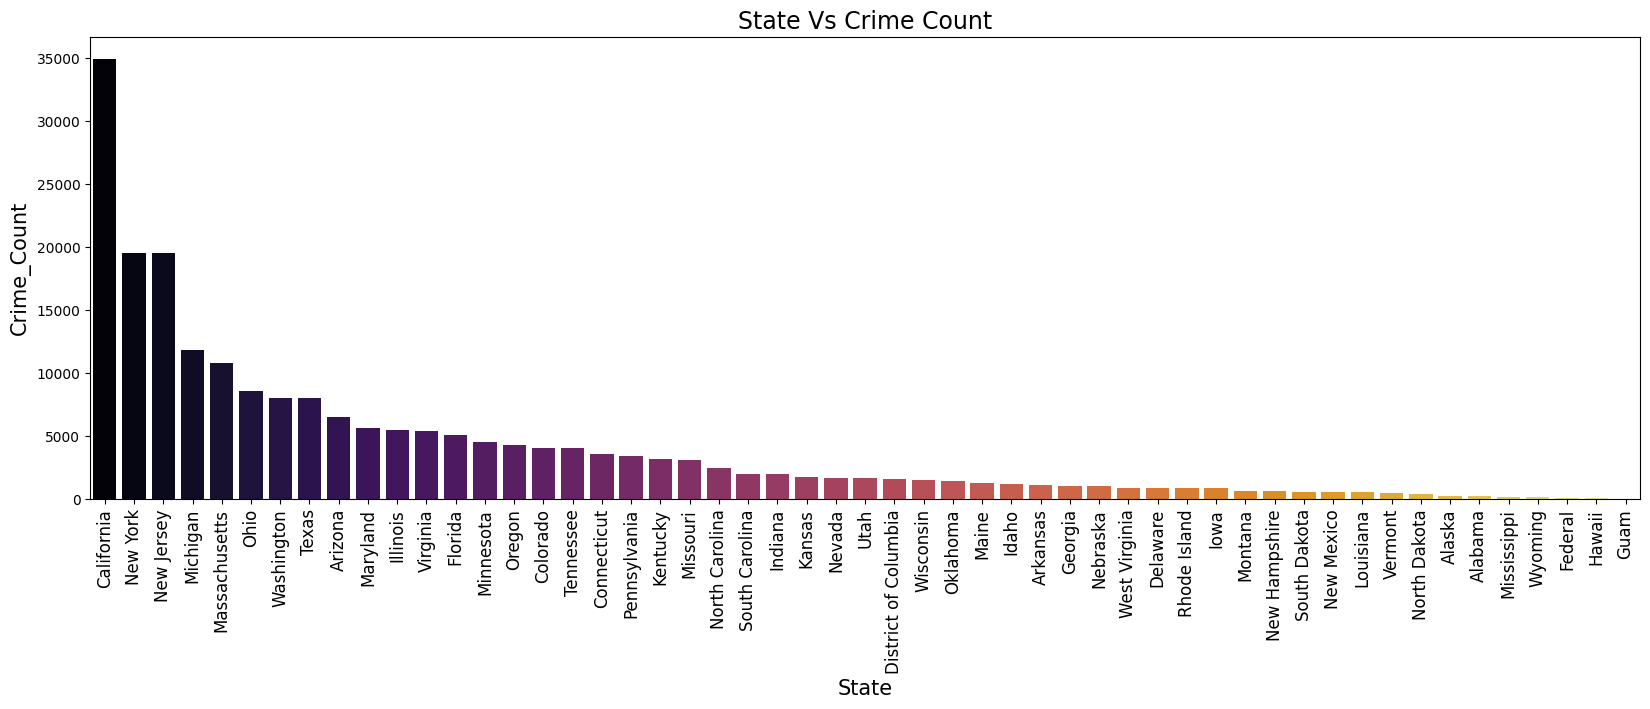

In [18]:
crime_cnt_by_state = crime_df['STATE_NAME'].value_counts().sort_values(ascending = False).reset_index()
crime_cnt_by_state.columns = ['State','Crime_Count']
plt.figure(figsize = (20,6))
sns.barplot(data = crime_cnt_by_state , x = 'State' , y = 'Crime_Count' , palette= 'inferno')
plt.xticks(rotation = 'vertical' , fontsize = 12)
plt.title('State Vs Crime Count' , size = 17)
plt.xlabel('State',size = 15)
plt.ylabel('Crime_Count',size = 15)
plt.show()

<Axes: >

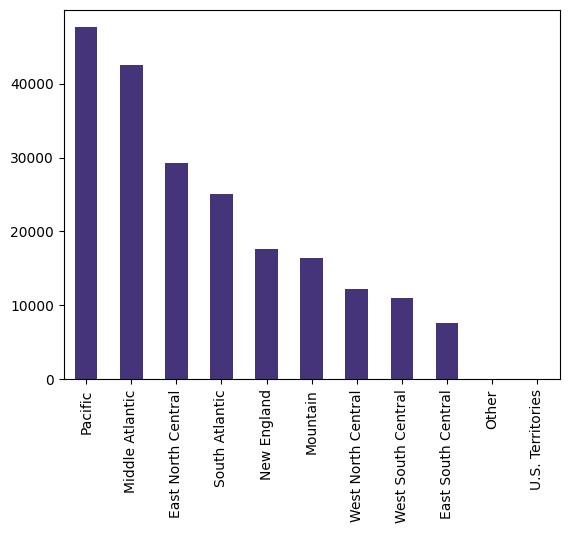

In [19]:
crime_df['DIVISION_NAME'].value_counts().sort_values(ascending = False).plot(kind = 'bar' , color = '#46347A')

<Axes: ylabel='REGION_NAME'>

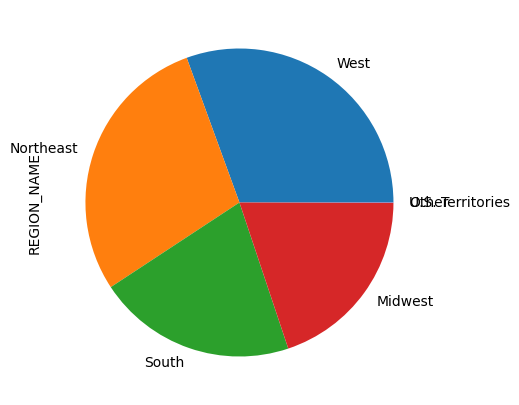

In [20]:
crime_df['REGION_NAME'].value_counts().sort_values(ascending = False).plot(kind = 'pie', figsize = (5,5))

In [21]:
# couldn't understand this 
crime_df['POPULATION_GROUP_DESC'].value_counts().sort_values(ascending = False)

Cities 1,000,000 or over                                                           29917
Cities from 50,000 thru 99,999                                                     23464
Cities from 25,000 thru 49,999                                                     23234
Cities from 500,000 thru 999,999                                                   20733
Cities from 10,000 thru 24,999                                                     20449
MSA counties 100,000 or over                                                       20009
Cities from 100,000 thru 249,999                                                   19984
Cities from 250,000 thru 499,999                                                   15066
Cities from 2,500 thru 9,999                                                       12475
Cities under 2,500                                                                 11080
MSA counties from 25,000 thru 99,999                                                5248
Non-MSA counties from

In [22]:
crime_df['OFFENDER_RACE'].value_counts().sort_values(ascending = False)

Unknown                                      92640
White                                        82628
Black or African American                    27191
Multiple                                      4238
Asian                                         1514
American Indian or Alaska Native              1154
Native Hawaiian or Other Pacific Islander       56
Name: OFFENDER_RACE, dtype: int64

In [23]:
crime_df['OFFENDER_ETHNICITY'].value_counts().sort_values(ascending = False)

Unknown                   18696
Not Hispanic or Latino     5122
Hispanic or Latino         1339
Multiple                    143
Name: OFFENDER_ETHNICITY, dtype: int64

In [24]:
crime_df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,POPULATION_GROUP_CODE,POPULATION_GROUP_DESC,INCIDENT_DATE,ADULT_VICTIM_COUNT,JUVENILE_VICTIM_COUNT,TOTAL_OFFENDER_COUNT,ADULT_OFFENDER_COUNT,JUVENILE_OFFENDER_COUNT,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,Bais_Description,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,5,"Cities from 10,000 thru 24,999",1991-08-31,NaN,NaN,1,NaN,NaN,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Race/Ethnicity/Ancestry,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,6,"Cities from 2,500 thru 9,999",1991-09-19,NaN,NaN,1,NaN,NaN,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Race/Ethnicity/Ancestry,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,3,"Cities from 50,000 thru 99,999",1991-07-04,NaN,NaN,1,NaN,NaN,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Race/Ethnicity/Ancestry,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,3,"Cities from 50,000 thru 99,999",1991-12-24,NaN,NaN,1,NaN,NaN,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Race/Ethnicity/Ancestry,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,3,"Cities from 50,000 thru 99,999",1991-12-23,NaN,NaN,1,NaN,NaN,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Race/Ethnicity/Ancestry,Individual,S,S


In [25]:
crime_df['VICTIM_COUNT'].sum()

260386

In [26]:
crime_df['OFFENSE_NAME'].value_counts().nlargest(10)

Destruction/Damage/Vandalism of Property                 64261
Intimidation                                             60971
Simple Assault                                           39768
Aggravated Assault                                       21843
Robbery                                                   3573
Burglary/Breaking & Entering                              2771
Destruction/Damage/Vandalism of Property;Intimidation     1813
All Other Larceny                                         1756
Arson                                                     1141
Drug/Narcotic Violations                                   924
Name: OFFENSE_NAME, dtype: int64

In [27]:
crime_df['LOCATION_NAME'].value_counts()[crime_df['LOCATION_NAME'].value_counts() > 100]

Residence/Home                                   62084
Highway/Road/Alley/Street/Sidewalk               39565
Other/Unknown                                    28357
School/College                                   17440
Parking/Drop Lot/Garage                          11879
Church/Synagogue/Temple/Mosque                    7927
Commercial/Office Building                        4723
Restaurant                                        4229
Bar/Nightclub                                     3721
Government/Public Building                        3093
Convenience Store                                 2709
Specialty Store                                   2452
School-Elementary/Secondary                       2433
Air/Bus/Train Terminal                            2050
Field/Woods                                       1992
Service/Gas Station                               1927
Grocery/Supermarket                               1742
Department/Discount Store                         1630
Drug Store

In [28]:
crime_df.columns

Index(['INCIDENT_ID', 'DATA_YEAR', 'ORI', 'PUB_AGENCY_NAME', 'PUB_AGENCY_UNIT',
       'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME', 'DIVISION_NAME',
       'REGION_NAME', 'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC',
       'INCIDENT_DATE', 'ADULT_VICTIM_COUNT', 'JUVENILE_VICTIM_COUNT',
       'TOTAL_OFFENDER_COUNT', 'ADULT_OFFENDER_COUNT',
       'JUVENILE_OFFENDER_COUNT', 'OFFENDER_RACE', 'OFFENDER_ETHNICITY',
       'VICTIM_COUNT', 'OFFENSE_NAME', 'TOTAL_INDIVIDUAL_VICTIMS',
       'LOCATION_NAME', 'BIAS_DESC', 'Bais_Description', 'VICTIM_TYPES',
       'MULTIPLE_OFFENSE', 'MULTIPLE_BIAS'],
      dtype='object')

In [29]:
crime_df['VICTIM_TYPES'].value_counts()

Individual                                               165875
Other                                                     13306
Business                                                   8946
Religious Organization                                     5929
Government                                                 5588
Society/Public                                             4853
Individual;Other                                           1584
Unknown                                                    1274
Business;Individual                                         830
Individual;Society/Public                                   376
Individual;Religious Organization                           211
Government;Individual                                       189
Law Enforcement Officer                                     118
Financial Institution                                        92
Individual;Unknown                                           52
Business;Government                     

In [30]:
crime_df['MULTIPLE_OFFENSE'].value_counts()

S    200087
M      9354
Name: MULTIPLE_OFFENSE, dtype: int64

In [31]:
crime_df['MULTIPLE_BIAS'].value_counts()

S    208792
M       649
Name: MULTIPLE_BIAS, dtype: int64

### Intermediate Feature Engineering 

In [32]:
crime_df['Month'] = crime_df['INCIDENT_DATE'].dt.month_name()

In [33]:
crime_df['Day_Name'] = crime_df['INCIDENT_DATE'].dt.day_name()

In [34]:
crime_df.head(3)

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,POPULATION_GROUP_CODE,POPULATION_GROUP_DESC,INCIDENT_DATE,ADULT_VICTIM_COUNT,JUVENILE_VICTIM_COUNT,TOTAL_OFFENDER_COUNT,ADULT_OFFENDER_COUNT,JUVENILE_OFFENDER_COUNT,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,Bais_Description,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS,Month,Day_Name
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,5,"Cities from 10,000 thru 24,999",1991-08-31,NaN,NaN,1,NaN,NaN,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Race/Ethnicity/Ancestry,Individual,S,S,August,Saturday
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,6,"Cities from 2,500 thru 9,999",1991-09-19,NaN,NaN,1,NaN,NaN,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Race/Ethnicity/Ancestry,Individual,S,S,September,Thursday
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,3,"Cities from 50,000 thru 99,999",1991-07-04,NaN,NaN,1,NaN,NaN,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Race/Ethnicity/Ancestry,Individual,S,S,July,Thursday


In [35]:
crime_df['MULTIPLE_OFFENSE'] = crime_df['MULTIPLE_OFFENSE'].map({
    'S' : 'Single' , 
    'M' : 'Multiple'
})

In [36]:
crime_df['MULTIPLE_BIAS'] = crime_df['MULTIPLE_BIAS'].map({
    'S' : 'Single' , 
    'M' : 'Multiple'
})

## Bivariate Analysis

In [37]:
crime_df.rename(columns = {
    'INCIDENT_ID':'Id',
    'DATA_YEAR':'Year',
    'ORI':'Ori',
    'PUB_AGENCY_NAME':'Agency Name',
    'PUB_AGENCY_UNIT':'Agency Unit',
    'AGENCY_TYPE_NAME':'Agency Type',
    'STATE_ABBR':'State Abbreviation',
    'STATE_NAME':'State',
    'DIVISION_NAME':'Division',
    'REGION_NAME':'Region',
    'POPULATION_GROUP_CODE':'Pop Group Code',
    'POPULATION_GROUP_DESC':'Group Desc',
    'INCIDENT_DATE':'Date of Incident',
    'ADULT_VICTIM_COUNT':'Adult Count',
    'JUVENILE_VICTIM_COUNT':'Juvenile Count',
    'TOTAL_OFFENDER_COUNT':'Total Counts (Offender)',
    'ADULT_OFFENDER_COUNT':'Count of Adult Offender',
    'JUVENILE_OFFENDER_COUNT':'Total Count of Juvenile Offender',
    'OFFENDER_RACE':'Offender Race',
    'OFFENDER_ETHNICITY':'Offender Ethnicity',
    'VICTIM_COUNT':'Victim Count',
    'OFFENSE_NAME':'Offense',
    'TOTAL_INDIVIDUAL_VICTIMS':'Total Individual Victims',
    'LOCATION_NAME':'Location',
    'BIAS_DESC':'Offenders Belief',
    'Bais_Description' : 'Belief"s Description',
    'VICTIM_TYPES':'Types of Victims',
    'MULTIPLE_OFFENSE':'Single/Multiple Offense',
    'MULTIPLE_BIAS':'Single/Multiple Bias',
} , inplace = True)

In [38]:
crime_df.head()

,Id,Year,Ori,Agency Name,Agency Unit,Agency Type,State Abbreviation,State,Division,Region,Pop Group Code,Group Desc,Date of Incident,Adult Count,Juvenile Count,Total Counts (Offender),Count of Adult Offender,Total Count of Juvenile Offender,Offender Race,Offender Ethnicity,Victim Count,Offense,Total Individual Victims,Location,Offenders Belief,"Belief""s Description",Types of Victims,Single/Multiple Offense,Single/Multiple Bias,Month,Day_Name
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,5,"Cities from 10,000 thru 24,999",1991-08-31,NaN,NaN,1,NaN,NaN,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Race/Ethnicity/Ancestry,Individual,Single,Single,August,Saturday
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,6,"Cities from 2,500 thru 9,999",1991-09-19,NaN,NaN,1,NaN,NaN,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Race/Ethnicity/Ancestry,Individual,Single,Single,September,Thursday
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,3,"Cities from 50,000 thru 99,999",1991-07-04,NaN,NaN,1,NaN,NaN,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Race/Ethnicity/Ancestry,Individual,Single,Single,July,Thursday
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,3,"Cities from 50,000 thru 99,999",1991-12-24,NaN,NaN,1,NaN,NaN,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Race/Ethnicity/Ancestry,Individual,Multiple,Single,December,Tuesday
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,3,"Cities from 50,000 thru 99,999",1991-12-23,NaN,NaN,1,NaN,NaN,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Race/Ethnicity/Ancestry,Individual,Single,Single,December,Monday


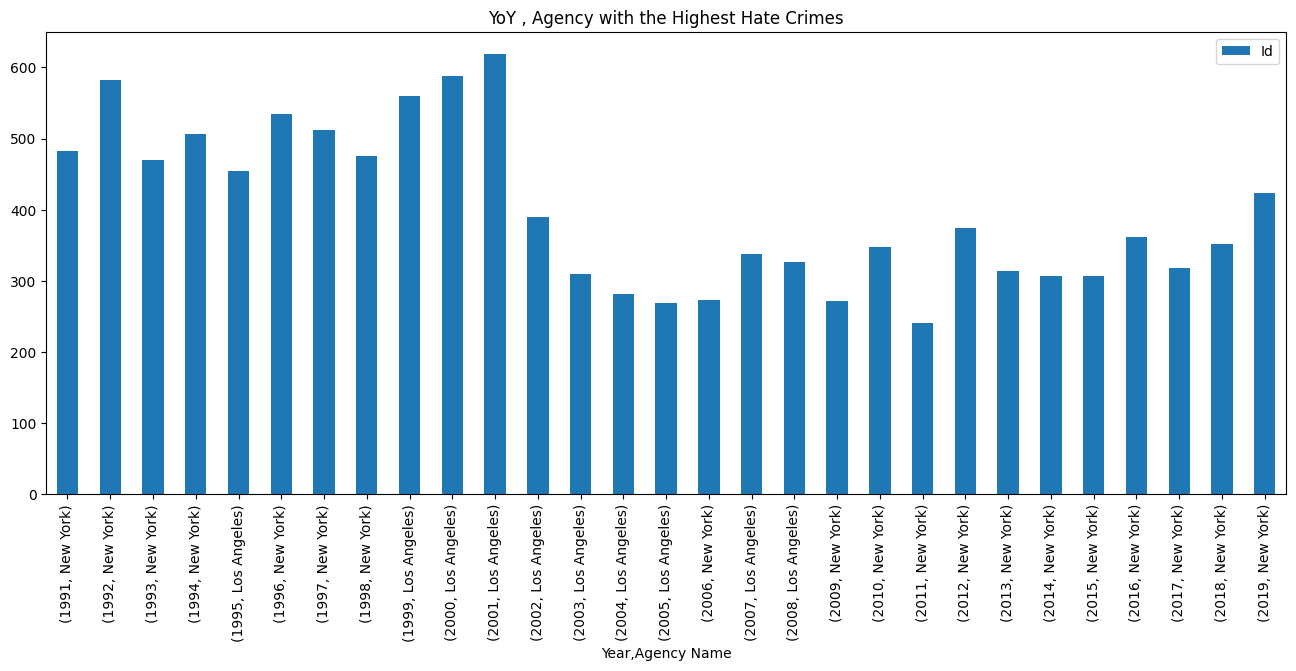

In [39]:

crime_df.groupby(['Year','Agency Name'], as_index = False)['Id'].count().sort_values(by = 'Id' , ascending = False).drop_duplicates(subset = ['Year']).sort_values(by = 'Year').set_index(['Year','Agency Name']).plot(kind = 'bar' , figsize = (16,6))
plt.xticks(rotation = 'vertical')
plt.title('YoY , Agency with the Highest Hate Crimes')
plt.show()

In [40]:
data_wrt_agency_type = crime_df.groupby(['Year','Agency Type'] , as_index = False)['Id'].count()

In [41]:
data_wrt_agency_type = data_wrt_agency_type.rename(columns = {'Id':'Count'})

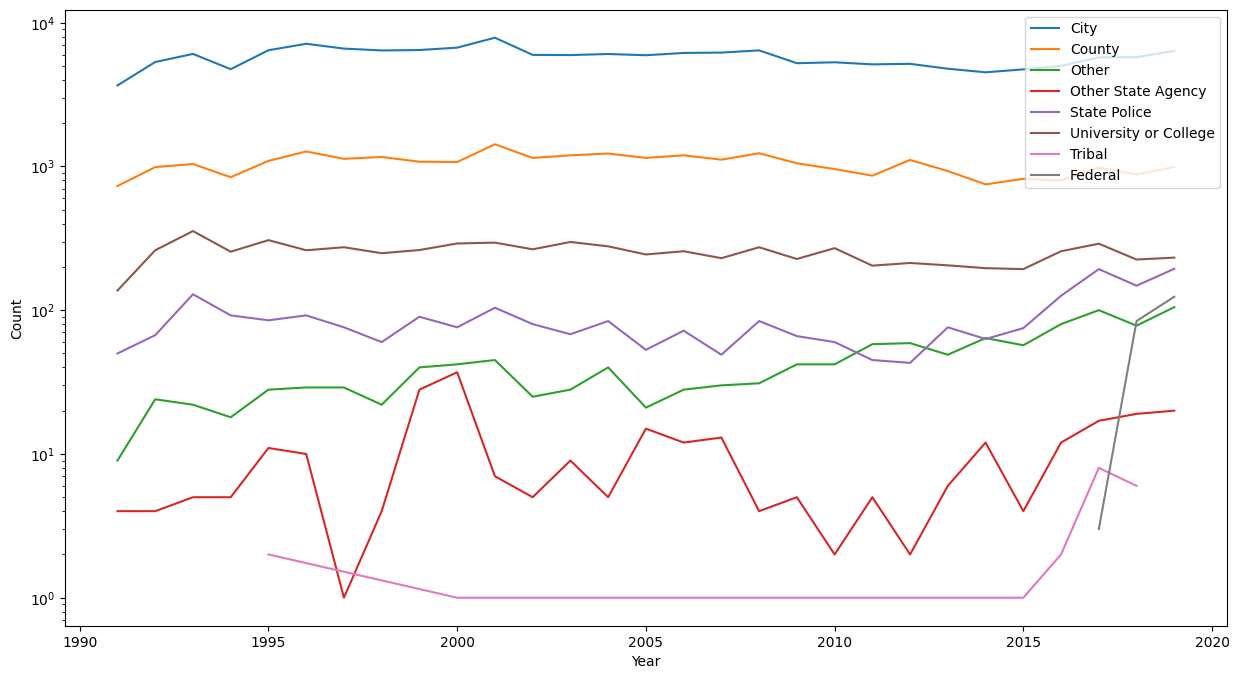

In [42]:
fig,ax = plt.subplots(figsize  = (15,8))
ax = sns.lineplot(data  = data_wrt_agency_type , x = 'Year' , y = 'Count' , hue = 'Agency Type')
ax.set_yscale('log')
ax.legend(loc  = 'upper right')

In [43]:
yoy_state_df = crime_df.groupby(['Year','State'],as_index = False)['Id'].sum().sort_values(by = ['State','Year'] , ascending = [True,True])

In [44]:
yoy_state_df = yoy_state_df.rename(columns = {'Id':'Count'})

In [45]:
yoy_state_df

,Year,State,Count
29,1992,Alabama,18370
69,1993,Alabama,56300
491,2002,Alabama,166923
540,2003,Alabama,90946
590,2004,Alabama,295476
737,2007,Alabama,849135
786,2008,Alabama,1418241
836,2009,Alabama,1232721
886,2010,Alabama,2728134
936,2011,Alabama,12470418


### Year wise Crime Count depiction for particular state 

In [46]:
def yoy_change(state):
    plt.figure(figsize = (10,4))
    temp  = yoy_state_df[yoy_state_df['State']==state]
    temp.set_index('Year',inplace = True)
    temp['Prev_Yr_Count'] = temp['Count'].shift(1)
    temp['Change'] = temp['Count'] - temp['Prev_Yr_Count']
    plt.plot(temp['Change'] ,  marker = 'o')
    plt.xticks(temp.index,rotation = 'vertical')

C:\Users\91700\AppData\Local\Temp\ipykernel_33612\3039437208.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Prev_Yr_Count'] = temp['Count'].shift(1)
C:\Users\91700\AppData\Local\Temp\ipykernel_33612\3039437208.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Change'] = temp['Count'] - temp['Prev_Yr_Count']


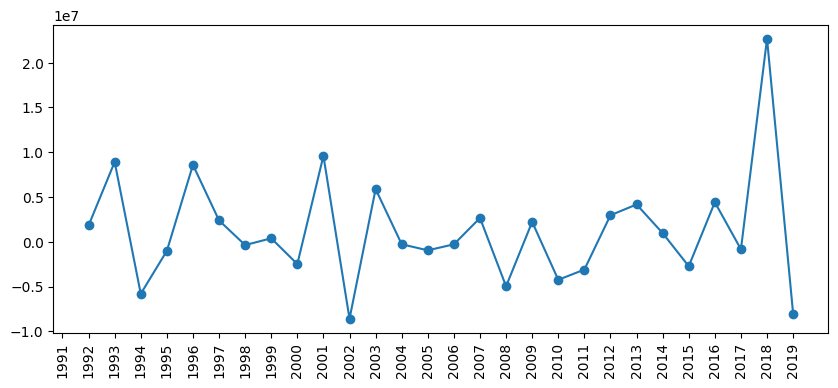

In [47]:
# give the name for any state you want to see the report for.
yoy_change('Illinois')

In [48]:
division_of_state  = crime_df.groupby(['State','Division'],as_index = False)['Id'].count()
division_of_state = division_of_state.rename(columns = {'Id':'Crime Count'})
division_of_state.sort_values(by = 'Crime Count' , ascending = False , inplace = True)
division_of_state.drop_duplicates(subset = ['State'] , inplace = True)
df = division_of_state.sort_values(by = ['Crime Count'] , ascending = False).set_index(['State','Division'])
df

,,Crime Count
State,Division,
California,Pacific,34911
New York,Middle Atlantic,19543
New Jersey,Middle Atlantic,19524
Michigan,East North Central,11834
Massachusetts,New England,10801
Ohio,East North Central,8548
Washington,Pacific,8059
Texas,West South Central,7996
Arizona,Mountain,6482


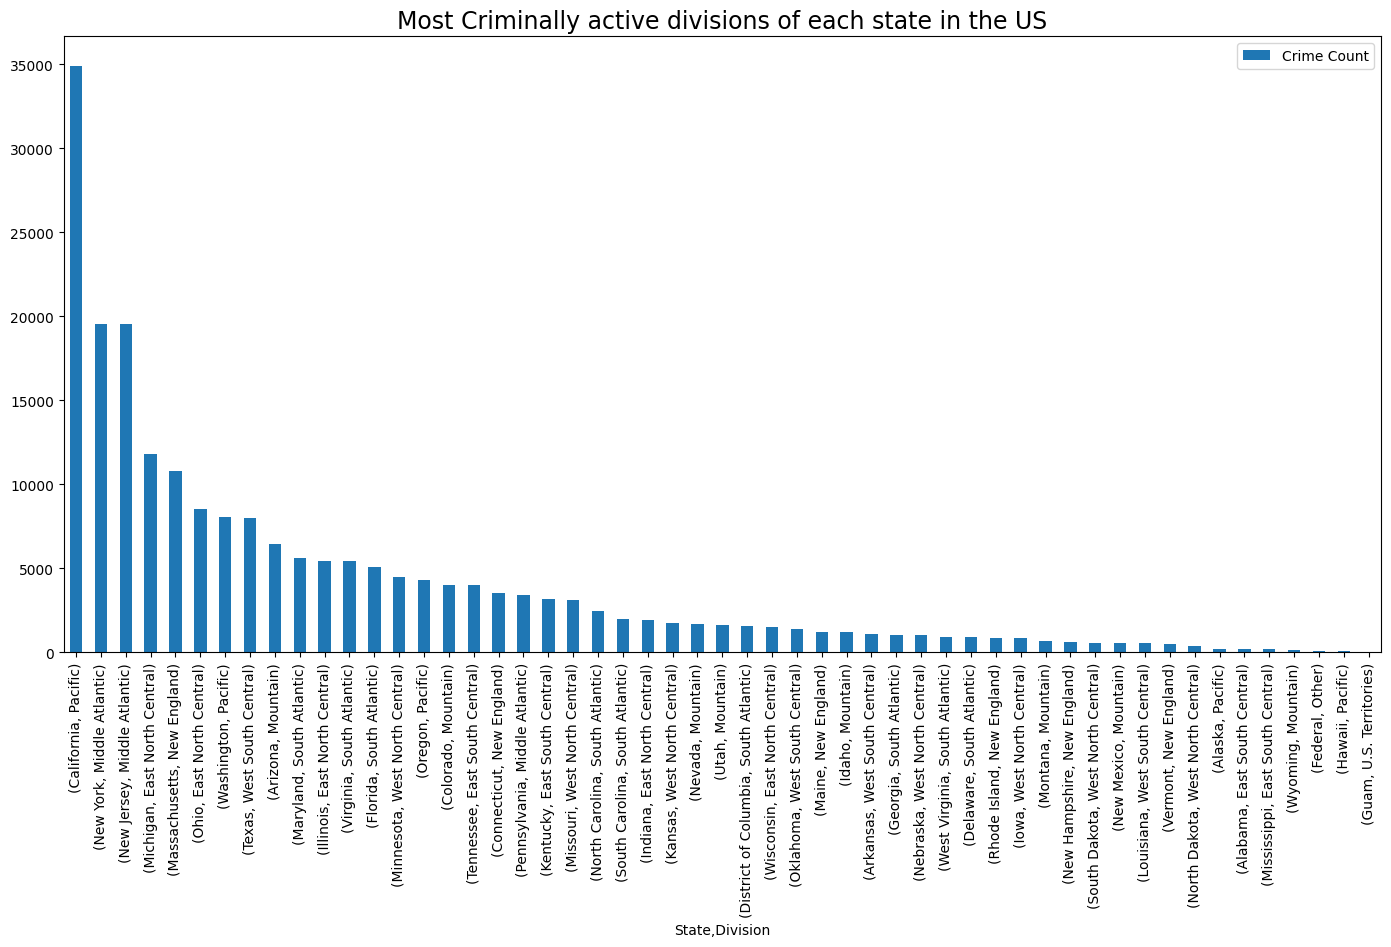

In [49]:
df.plot(kind = 'bar',figsize = (17,8))
plt.title('Most Criminally active divisions of each state in the US',size=17)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

In [50]:
crime_df.head(3)

,Id,Year,Ori,Agency Name,Agency Unit,Agency Type,State Abbreviation,State,Division,Region,Pop Group Code,Group Desc,Date of Incident,Adult Count,Juvenile Count,Total Counts (Offender),Count of Adult Offender,Total Count of Juvenile Offender,Offender Race,Offender Ethnicity,Victim Count,Offense,Total Individual Victims,Location,Offenders Belief,"Belief""s Description",Types of Victims,Single/Multiple Offense,Single/Multiple Bias,Month,Day_Name
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,5,"Cities from 10,000 thru 24,999",1991-08-31,NaN,NaN,1,NaN,NaN,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Race/Ethnicity/Ancestry,Individual,Single,Single,August,Saturday
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,6,"Cities from 2,500 thru 9,999",1991-09-19,NaN,NaN,1,NaN,NaN,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Race/Ethnicity/Ancestry,Individual,Single,Single,September,Thursday
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,3,"Cities from 50,000 thru 99,999",1991-07-04,NaN,NaN,1,NaN,NaN,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Race/Ethnicity/Ancestry,Individual,Single,Single,July,Thursday


In [51]:
# most criminally active part of the cities
city_div = crime_df.groupby(['Agency Name','Region'],as_index = False)['Id'].count()
city_div.rename(columns = {'Id':'Crime Count'},inplace = True)
city_div.sort_values(by = ['Crime Count'] , ascending = False , inplace = True)

In [52]:
city_div = city_div.drop_duplicates(subset = ['Agency Name'])

In [53]:
city_div.sort_values(by = 'Crime Count' , ascending = False).head(10)

,Agency Name,Region,Crime Count
4447,New York,Northeast,10447
3621,Los Angeles,West,8184
614,Boston,Northeast,4413
5019,Phoenix,West,3763
5614,San Francisco,West,3346
6217,Suffolk County Police Department,Northeast,2582
1332,Columbus,Midwest,2345
5610,San Diego,West,2244
4355,Nassau,Northeast,2219
1126,Chicago,Midwest,2179


In [54]:
# most active part of the state . 
state_div = crime_df.groupby(['State','Region'],as_index = False)['Id'].count()
state_div.rename(columns = {'Id':'Crime Count'},inplace = True)
state_div.sort_values(by = ['Crime Count'] , ascending = False , inplace = True)
state_div = state_div.drop_duplicates(subset = ['State'])
state_div.sort_values(by = 'Crime Count' , ascending = False).head(10)

,State,Region,Crime Count
4,California,West,34911
34,New York,Northeast,19543
32,New Jersey,Northeast,19524
24,Michigan,Midwest,11834
23,Massachusetts,Northeast,10801
37,Ohio,Midwest,8548
49,Washington,West,8059
45,Texas,South,7996
2,Arizona,West,6482
22,Maryland,South,5648


In [57]:
crime_df['Year'].min()

1991